## Curve-fitting example for a linear model
Implementation of curve-fitting in Python using `curve_fit` from the `optimize` sub-module of `scipy`.
In this notebook `curve_fit` is used to fit a linear model, but it also works on nonlinear models.
When used on linear models, `curve_fit` finds the the optimum parameters in the same way that it does
for nonlinear models, i.e., it doesn't use the linear algebra methods employed by `np.linalg.lstsq` (and 
very many other linear least squares routines).  When `curve_fit` is used on linear problems, there is 
no need to provide initial estimates of the fit parameters.

My opinion is that for most problems, there is no need to employ different routines for linear and 
nonlinear models.

Marty Ligare, August 2020

In [2]:
import numpy as np
from scipy import optimize

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

#### Define function to be fit<br>Determine initial parameters for search

In [4]:
def fun(x, m, b):
    '''Straight line function'''
    return m*x + b

#### Data
Each line is a value of $x_i$, $y_i$, and $\sigma_i$.

In [5]:
data = np.array([[ 1.        ,  1.93600566,  1.        ],
       [ 2.        ,  3.3680459 ,  1.        ],
       [ 3.        ,  7.85485457,  1.        ],
       [ 4.        ,  7.92384837,  1.        ],
       [ 5.        ,  9.5314355 ,  1.        ],
       [ 6.        , 12.34356817,  1.        ],
       [ 7.        , 14.77261422,  1.        ],
       [ 8.        , 14.88579636,  1.        ],
       [ 9.        , 18.57745906,  1.        ],
       [10.        , 18.87946866,  1.        ]])

In [6]:
x, y, u = data.T

#### Plot raw data

<IPython.core.display.Javascript object>


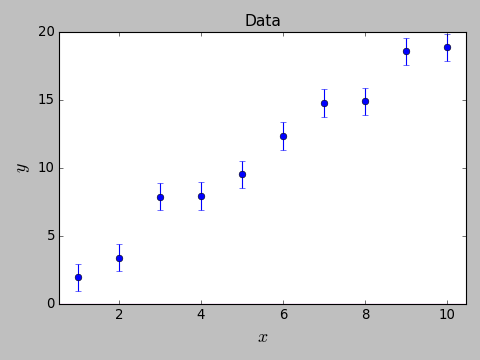

In [7]:
plt.figure()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Data')
plt.axhline(0, color='magenta')
# Pad x-range on plot: 
plt.xlim(min(x) - 0.05*(max(x) - min(x)), max(x) + 0.05*(max(x) - min(x)))  
plt.errorbar(x, y, yerr=1, fmt='o');

#### Fit data, and plot fit-function with optimized parameters
+ `curve_fit` returns best-fit parameters ($\rightarrow$ `popt`)  and the covariance matrix ($\rightarrow$ `pcov`).
+ Uncertainties in the fit parameters are given by the square roots of the diagonal elements of the covariance matrix.

In [8]:
popt, pcov = optimize.curve_fit(fun, x, y, sigma=u)

<IPython.core.display.Javascript object>


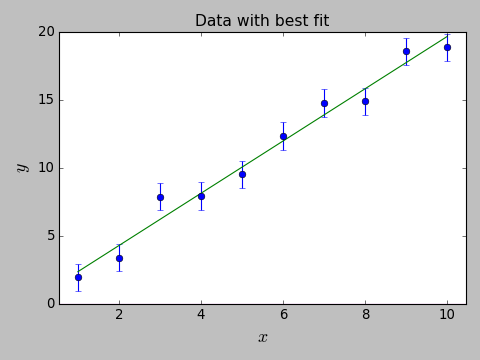

In [9]:
plt.figure()
# "quasi-continuous" set of x's for plotting of function:
xfine = np.linspace(min(x), max(x), 201)  
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Data with best fit')
plt.axhline(0, color='magenta')
# Pad x-range on plot:
plt.xlim(min(x) - 0.05*(max(x) - min(x)), max(x) + 0.05*(max(x) - min(x)))  
plt.errorbar(x, y, yerr=u, fmt='o')
plt.plot(xfine, fun(xfine, *popt));

In [10]:
popt  # Best fit parameters

array([1.92406181, 0.4249697 ])

In [11]:
pcov # Covariance matrix

array([[ 0.01081589, -0.05948742],
       [-0.05948742,  0.41641187]])

In [12]:
for i in range(len(popt)):  
    print("parameter", i,"=", popt[i], "+/-", np.sqrt(pcov[i,i]))

parameter 0 = 1.9240618078201974 +/- 0.1039994928352545
parameter 1 = 0.4249697039987471 +/- 0.6452998324837926


<b>NOTE:</b>

`absolute_sigma=True` is equivalent to Mathematica `VarianceEstimatorFunction-> (1&)`.<br>
`Fals`e gives covariance matrix based on estimated errors in data (weights are just relative).

#### Residuals

<IPython.core.display.Javascript object>


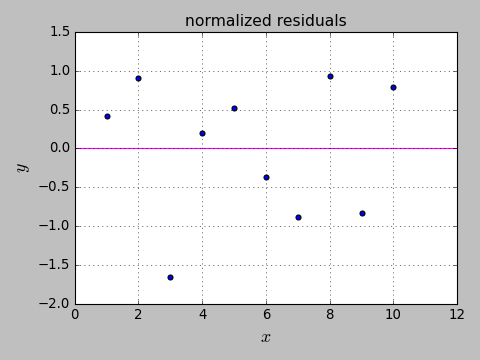

In [13]:
plt.figure()
r = (fun(x, *popt) - y)/u   # calculate residuals
plt.scatter(x,r)
plt.axhline(0, color='magenta')
plt.title('normalized residuals')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid();

#### Calculation of reduced chi-square parameter:

\begin{equation}
\chi_R^2= \frac{1}{N-c}\times\sum_{i=1}^N \frac{(y_i-f(x_i))^2}{\sigma_i^2}, 
\end{equation}


In [14]:
np.sum((y - fun(x, *popt))**2/u**2)/(len(x) - 2)

0.8923112455589809

#### Version details
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [15]:
%load_ext version_information

In [17]:
%version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.7.1908 Core
numpy 1.18.5
scipy 1.5.2
matplotlib 3.3.0
Fri Aug 07 13:07:58 2020 EDT